In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


In [43]:
df = pd.read_csv("../data/processed/trades_processed.csv")


In [44]:
# Basic info about dataset
df.info()

# Quick statistics
df.describe()

# First few rows again
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        1200 non-null   object 
 1   pair             1200 non-null   object 
 2   action           1200 non-null   object 
 3   size             1200 non-null   float64
 4   price            1200 non-null   float64
 5   pnl              1200 non-null   float64
 6   notes            251 non-null    object 
 7   detected_biases  79 non-null     object 
 8   bias_flag        1200 non-null   object 
dtypes: float64(3), object(6)
memory usage: 84.5+ KB


,timestamp,pair,action,size,price,pnl,notes,detected_biases,bias_flag
0,2024-01-01 08:30:00,EUR/JPY,Buy,2.0,145.21607,-60.0,NaN,NaN,No
1,2024-01-01 09:07:00,EUR/USD,Buy,1.5,1.09212,375.0,NaN,NaN,No
2,2024-01-01 16:21:00,USD/CAD,Sell,0.1,1.33906,-5.0,NaN,NaN,No
3,2024-01-01 20:06:00,EUR/AUD,Buy,0.1,1.61763,19.0,NaN,NaN,No
4,2024-01-02 04:01:00,AUD/JPY,Buy,1.0,144.79578,120.0,NaN,NaN,No


/var/folders/vp/7cs7t_953kscjs623sfz7t2r0000gn/T/ipykernel_15368/1381394752.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bias_counts.index, y=bias_counts.values, palette="viridis")


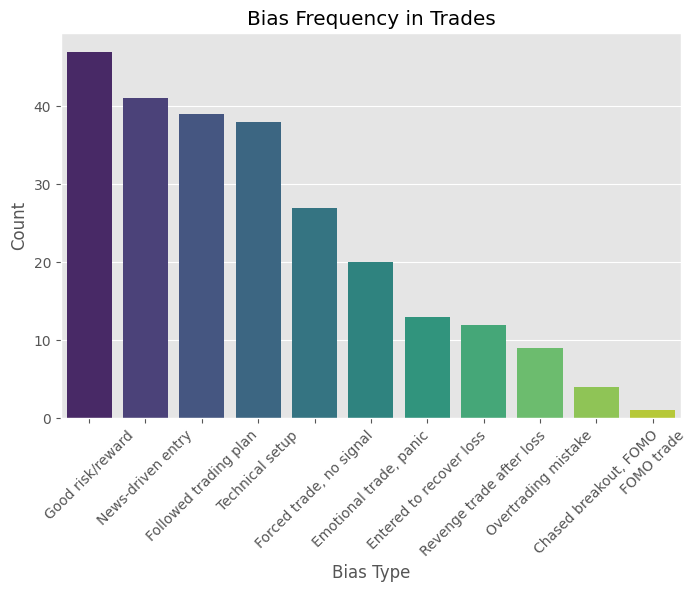

In [45]:
# Count of each bias type (from 'notes' column)
bias_counts = df['notes'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=bias_counts.index, y=bias_counts.values, palette="viridis")

plt.title("Bias Frequency in Trades")
plt.xlabel("Bias Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


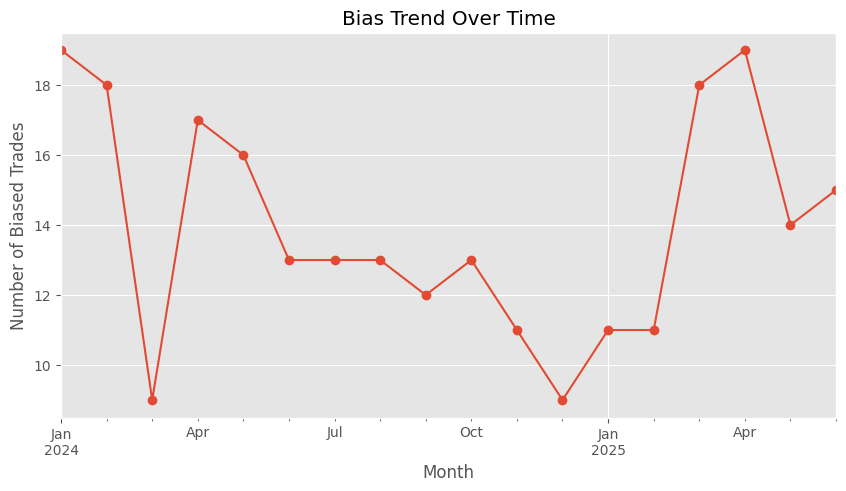

In [46]:
# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Group by month and count biases (notes column)
bias_trend = df.groupby(df['timestamp'].dt.to_period("M"))['notes'].count()

plt.figure(figsize=(10,5))
bias_trend.plot(kind='line', marker='o')

plt.title("Bias Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Biased Trades")
plt.grid(True)
plt.show()


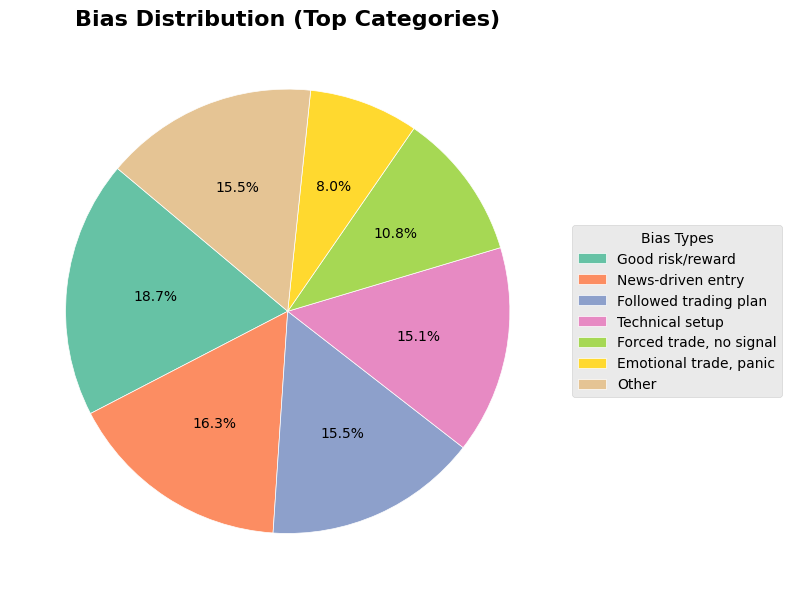

In [47]:
# Count bias types
bias_counts = df['notes'].value_counts()

# Keep top 6, group rest as "Other"
top_biases = bias_counts[:6]
others = pd.Series(bias_counts[6:].sum(), index=["Other"])
bias_cleaned = pd.concat([top_biases, others])

# Plot
plt.figure(figsize=(8,8))
colors = sns.color_palette("Set2", len(bias_cleaned))

wedges, texts, autotexts = plt.pie(
    bias_cleaned,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

# Improve label size
for text in texts:
    text.set(size=12)
for autotext in autotexts:
    autotext.set(size=10, color="black")

plt.title("Bias Distribution (Top Categories)", fontsize=16, weight="bold")
plt.legend(bias_cleaned.index, title="Bias Types", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


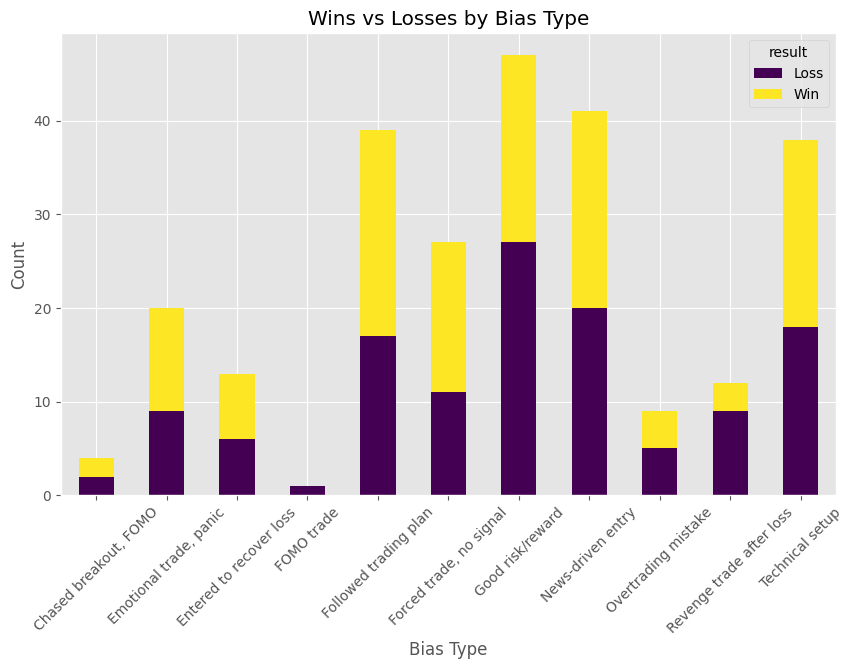

In [48]:
# Create win/loss column
df['result'] = df['pnl'].apply(lambda x: "Win" if x > 0 else "Loss")

# Crosstab bias vs result
bias_result = pd.crosstab(df['notes'], df['result'])

bias_result.plot(kind='bar', stacked=True, figsize=(10,6), colormap="viridis")

plt.title("Wins vs Losses by Bias Type")
plt.xlabel("Bias Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
